In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import itertools
import joblib
from matplotlib import pyplot as plot
import os
import gc
from load_dataset import get_dataloader

e:\Protein-Protein\load_dataset.py:75: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  embbedings = torch.Tensor([[val['emb']] for val in embeddings_dict.values()])


In [3]:
class ConvNet1D(nn.Module):
    def __init__(self, input_size, output_size, in_channels):
        super(ConvNet1D, self).__init__()
        self.layers = nn.ModuleList()
        self.in_channels = in_channels
        self.out_dim = input_size
        for i in range(len(self.in_channels)-1):
            self.layers.append(nn.Conv1d(self.in_channels[i], self.in_channels[i+1],  kernel_size=3, stride=1, padding=1))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool1d(kernel_size=2, stride=2))
            self.out_dim = self.compute_dim(self.out_dim, 3,1,1,2,2)
            
        self.conv_net = nn.Sequential(*self.layers)
        self.fc = nn.Linear(int(self.out_dim* self.in_channels[-1]), output_size)
        
    def forward(self, x):
        out = self.conv_net(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
    def compute_dim(self, dim, conv_k, conv_s, conv_p, pool_k, pool_s):
        dim = np.floor(((dim - conv_k + 2 *conv_p)/conv_s)+1)
        return np.floor(((dim - pool_k)/pool_s)+1)



In [5]:
gpu = torch.device('cpu') 
gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gpu

device(type='cuda', index=0)

In [6]:
def train(conv_net, train_loader, test_loader, optimizer:optim, epochs:int = 10, batch_size:int = 64, loss_fn =nn.MSELoss()):
    train_losses = []
    test_losses = []

    for i in range(epochs):
        print('epoch {}'.format(i))
        epoch_loss = []
        test_loss = []

        # Training
        for _, (batch,labels) in tqdm(enumerate(train_loader), total=np.ceil(len(train_loader)/batch_size)):
            conv_net.zero_grad()
            # print(type(batch), batch.shape)
            batch = batch.to(gpu)
            labels = labels.view(len(batch), -1).to(gpu)
            
            output = conv_net(batch)
            loss_train = loss_fn(output, labels)
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            epoch_loss.append(loss_train.item())

        # Test Set
        for _, (batch,labels) in enumerate(test_loader):
            conv_net.zero_grad()
            batch = batch.to(gpu)
            labels = labels.view(len(batch), -1).to(gpu)

            output = conv_net(batch)
            loss_test = loss_fn(output, labels)
            test_loss.append(loss_test.item())

        train_losses.append(np.average(epoch_loss))
        test_losses.append(np.average(test_loss))
    return train_losses, test_losses
    


In [5]:
net = ''
gc.collect()
net = ConvNet1D(1024, 1965*21, [1,4,8,16]).to(gpu)

In [13]:
train_loader, test_loader = get_dataloader('Prots_embeddings_1d.joblib', 128)

ValueError: test_size=0.0 should be either positive and smaller than the number of samples 10 or a float in the (0, 1) range

In [14]:
optimizer = optim.Adagrad(net.parameters(), lr=0.001)

In [24]:
results = train(net, train_loader, test_loader, optimizer, epochs=100)

epoch 0


289it [00:12, 22.33it/s]                       


epoch 1


289it [00:12, 22.74it/s]                       


epoch 2


289it [00:12, 22.67it/s]                       


epoch 3


289it [00:12, 22.65it/s]                       


epoch 4


289it [00:12, 22.59it/s]                       


epoch 5


289it [00:12, 22.81it/s]                       


epoch 6


289it [00:12, 22.65it/s]                       


epoch 7


289it [00:12, 22.61it/s]                       


epoch 8


289it [00:12, 22.63it/s]                       


epoch 9


289it [00:12, 22.63it/s]                       


epoch 10


289it [00:12, 22.81it/s]                       


epoch 11


289it [00:12, 22.84it/s]                       


epoch 12


289it [00:12, 22.88it/s]                       


epoch 13


289it [00:12, 22.84it/s]                       


epoch 14


289it [00:12, 22.81it/s]                       


epoch 15


289it [00:14, 20.55it/s]                       


epoch 16


289it [00:13, 21.53it/s]                       


epoch 17


289it [00:15, 18.13it/s]                       


epoch 18


289it [00:16, 17.94it/s]                       


epoch 19


289it [00:18, 16.04it/s]                       


epoch 20


289it [00:15, 18.91it/s]                       


epoch 21


289it [00:14, 20.25it/s]                       


epoch 22


289it [00:15, 18.58it/s]                       


epoch 23


289it [00:15, 18.67it/s]                       


epoch 24


289it [00:14, 20.39it/s]                       


epoch 25


289it [00:15, 18.14it/s]                       


epoch 26


289it [00:16, 17.30it/s]                       


epoch 27


289it [00:16, 17.42it/s]                       


epoch 28


289it [00:15, 18.67it/s]                       


epoch 29


289it [00:16, 17.65it/s]                       


epoch 30


289it [00:16, 17.87it/s]                       


epoch 31


289it [00:16, 17.97it/s]                       


epoch 32


289it [00:16, 17.78it/s]                       


epoch 33


289it [00:16, 17.59it/s]                       


epoch 34


289it [00:16, 17.80it/s]                       


epoch 35


289it [00:16, 17.83it/s]                       


epoch 36


289it [00:16, 18.02it/s]                       


epoch 37


289it [00:15, 18.93it/s]                       


epoch 38


289it [00:16, 18.06it/s]                       


epoch 39


289it [00:15, 18.70it/s]                       


epoch 40


289it [00:15, 18.32it/s]                       


epoch 41


289it [00:16, 17.98it/s]                       


epoch 42


289it [00:16, 17.85it/s]                       


epoch 43


289it [00:15, 18.08it/s]                       


epoch 44


289it [00:16, 17.83it/s]                       


epoch 45


289it [00:15, 18.61it/s]                       


epoch 46


289it [00:15, 18.72it/s]                       


epoch 47


289it [00:16, 17.84it/s]                       


epoch 48


289it [00:16, 17.87it/s]                       


epoch 49


289it [00:15, 18.73it/s]                       


epoch 50


289it [00:15, 18.92it/s]                       


epoch 51


289it [00:15, 18.59it/s]                       


epoch 52


289it [00:15, 18.76it/s]                       


epoch 53


289it [00:15, 18.53it/s]                       


epoch 54


289it [00:16, 18.05it/s]                       


epoch 55


289it [00:15, 18.62it/s]                       


epoch 56


289it [00:15, 18.31it/s]                       


epoch 57


289it [00:15, 18.18it/s]                       


epoch 58


289it [00:15, 18.44it/s]                       


epoch 59


289it [00:15, 18.33it/s]                       


epoch 60


289it [00:15, 18.51it/s]                       


epoch 61


289it [00:15, 18.48it/s]                       


epoch 62


289it [00:15, 18.24it/s]                       


epoch 63


289it [00:15, 18.52it/s]                       


epoch 64


289it [00:15, 18.45it/s]                       


epoch 65


289it [00:15, 18.30it/s]                       


epoch 66


289it [00:15, 18.45it/s]                       


epoch 67


289it [00:15, 18.28it/s]                       


epoch 68


289it [00:15, 18.47it/s]                       


epoch 69


289it [00:15, 18.27it/s]                       


epoch 70


289it [00:15, 18.17it/s]                       


epoch 71


289it [00:15, 18.48it/s]                       


epoch 72


289it [00:15, 18.56it/s]                       


epoch 73


289it [00:15, 18.83it/s]                       


epoch 74


289it [00:15, 18.14it/s]                       


epoch 75


289it [00:15, 18.73it/s]                       


epoch 76


289it [00:15, 18.99it/s]                       


epoch 77


289it [00:15, 18.52it/s]                       


epoch 78


289it [00:15, 18.19it/s]                       


epoch 79


289it [00:15, 18.33it/s]                       


epoch 80


289it [00:15, 18.12it/s]                       


epoch 81


289it [00:15, 19.12it/s]                       


epoch 82


289it [00:15, 18.46it/s]                       


epoch 83


289it [00:15, 18.21it/s]                       


epoch 84


289it [00:15, 18.50it/s]                       


epoch 85


289it [00:15, 18.48it/s]                       


epoch 86


289it [00:16, 17.96it/s]                       


epoch 87


289it [00:17, 16.47it/s]                       


epoch 88


289it [00:13, 20.97it/s]                       


epoch 89


289it [00:14, 19.92it/s]                       


epoch 90


289it [00:13, 22.19it/s]                       


epoch 91


289it [00:12, 22.41it/s]                       


epoch 92


289it [00:12, 22.25it/s]                       


epoch 93


289it [00:13, 22.19it/s]                       


epoch 94


289it [00:13, 22.14it/s]                       


epoch 95


289it [00:13, 21.66it/s]                       


epoch 96


289it [00:13, 21.58it/s]                       


epoch 97


289it [00:13, 21.67it/s]                       


epoch 98


289it [00:13, 21.85it/s]                       


epoch 99


289it [00:13, 21.68it/s]                       


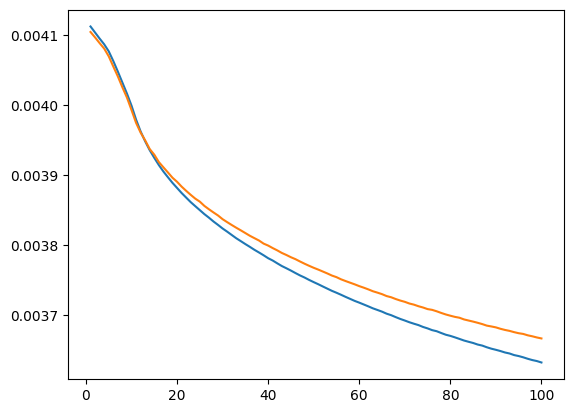

In [25]:
plot.plot(range(1,len(results[0])+1), results[0])
plot.plot(range(1,len(results[1])+1), results[1], label='test')

In [26]:
joblib.dump(net, 'models/convNet1D.joblib')

['models/convNet1D.joblib']